# Laboratorio 02: 

### Intuición estadística modelos de *machine learning*

1. Generar dos distribuciones de probabilidad centradas en 5.0,  7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad. 

  a). Emplear el objeto [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y el metodo *Probability density function* (pdf)

  b) Realizar un gráfico de ambas distribuciones

2.  ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso. 


### Modelo de *machine learning*

3. Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

4. Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 



5. Con los datos anteriores construya un DataFrame con los *features* y *labels* de la siguiente forma:


 |Y(*labels*)         | X_1(*feature*)       |
 |----------|----------|
 |$Y^{1}$ | $X_1^{1}$|
 |$Y^{2}$ | $X_1^{2}$|
 |.         | .        |
 |.         | .        |
 |.         | .        |
 |$Y^{m}$ | $X_1^{m}$  |

- Se sugiere emplear las claves Y, X para los labels y features respectivamente.
- $Y^{1},Y^{2}... Y^{m} $ son los  label de entrenamiento.
- $X_1^{1},X_1^{2}... X_1^{m} $ es el conjunto de datos de entrenamiento asociado a la característica 1 en el entrenamiento m. 
- Este dataframe será el dataset de entrenamiento, para los datos de test construiremos 50 variables aleatorias. 



6. Construye un segundo data frame con 50 datos de test, asociados a las   muestras de  las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves  Y, X_1.

### Modelo de machining learning 
7. Por ahora, emplearemos  clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
  - Definir el modelo y realizar el fit:
  ```
    clf = LinearRegression()
    clf.fit(XTrain, YTrain)
  ```
  - Determinar el score de los datos de entrenamiento 
 
  ```
  score = clf.score(XTrain, YTrain)
  ```
  - Determinar el score para los datos de test, ¿que puede concluir mirando los scores?

  Nota: 
  Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo. 
  
  ```
    - DecisionTreeClassifier(max_depth=3),
    - SVC(kernel="linear", C=0.025)
  ```

8. Existen librerias que pueden optmizar los hyperparametros de cualquier modelo:   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) prueba a implementar las siguientes lineas de código con el siguiente modelo:

```
from sklearn.model_selection import GridSearchCV

  param_grid = { 
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
  CV_clf.fit(XTrain, YTrain)
```

9. En los algoritmos de *machining learning* es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal. 

```
title = "Learning Curves"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.5, 1.01),  n_jobs=4
)
```


10. Pruea a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
  - Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2  
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5  
  -¿Qué puede concluir? de cada prueba.


Nota: Busca siempre la manera de construir tus codigos de forma estructurada  de tal forma que puedar variar parametros con facilidad.




In [337]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

In [339]:
# 1. Construir dos distribuciones 
x = np.linspace(0, 12,100)
mus = [5.0,7.5]
devs = [2.5,1.5]

f1 = stats.norm(loc = mus[0], scale = devs[0])
f2 = stats.norm(loc = mus[1], scale= devs[1])

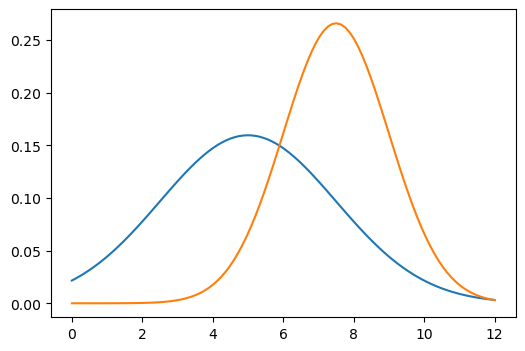

In [341]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
pdf1 = f1.pdf(x)
pdf2 = f2.pdf(x)
ax.plot(x,pdf1)
ax.plot(x,pdf2)


## 2
 <p style="font-size:18px">La mejor frontera en este caso sería una línea vertical que pase por el punto donde la diferencia absoluta entre estas dos funciones sea mínimo, esto es, el punto donde la probabilidad de ambos es la misma.</p>

Una expresión analítica en este caso para la frontera propuesta será: x=


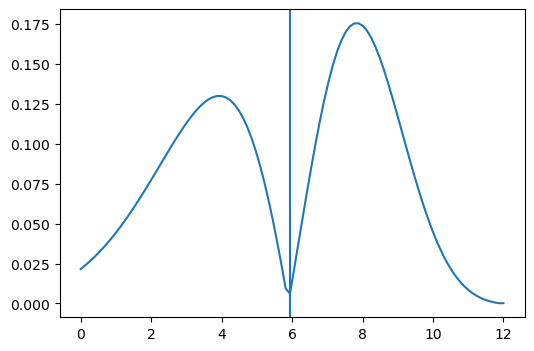

In [344]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.plot(x,abs(f1.pdf(x)-f2.pdf(x)))


absDiff = abs(f1.pdf(x)-f2.pdf(x))

maxIndexPdf1 = np.where(pdf1 == np.max(pdf1))[0]
maxIndexPdf2 = np.where(pdf2 == np.max(pdf2))[0]
#Truncando el intervalo de X
xMinMax = x[maxIndexPdf1[0]:maxIndexPdf2[0]]
indexMin = np.argmin(abs(f1.pdf(xMinMax)-f2.pdf(xMinMax)))
ax.axvline(x[maxIndexPdf1[0]+indexMin])

maxIndixes = np.where(absDiff == np.max(absDiff))[0]
newStart = x[maxIndixes[0]]
newEnd = x[maxIndixes[-1]]
xDiffMin = x[maxIndexPdf1[0]+indexMin]
print("Una expresión analítica en este caso para la frontera propuesta será: x="+str())

## 3
<p style="font-size:18px">Creamos las muestras de cada distribución usando random value sample</p>

In [347]:
sampleF1 = f1.rvs(size=100)
sampleF2 = f2.rvs(size=100)

In [349]:
#Construimos el Dataframe con las etiquetas correspondientes:
dfTrain1 = pd.DataFrame(data={'X_1':sampleF1,'Y':np.zeros(sampleF1.size)})
dfTrain2 = pd.DataFrame(data={'X_1':sampleF2,'Y':np.ones(sampleF2.size)})
dfTrain = pd.concat([dfTrain1,dfTrain2],ignore_index=True)
dfTrain

,X_1,Y
0,2.600530,0.0
1,0.308408,0.0
2,5.729351,0.0
3,5.314046,0.0
4,6.490768,0.0
...,...,...
195,7.791666,1.0
196,6.320690,1.0
197,5.495719,1.0
198,4.053503,1.0


## 4,5
<p style="font-size:18px">Creamos el dataset con los datos de entrenamiento y hacemos un scatter de las muestras. Adicionalmente, se dibuja la frontera propuesta inicialmente.</p>

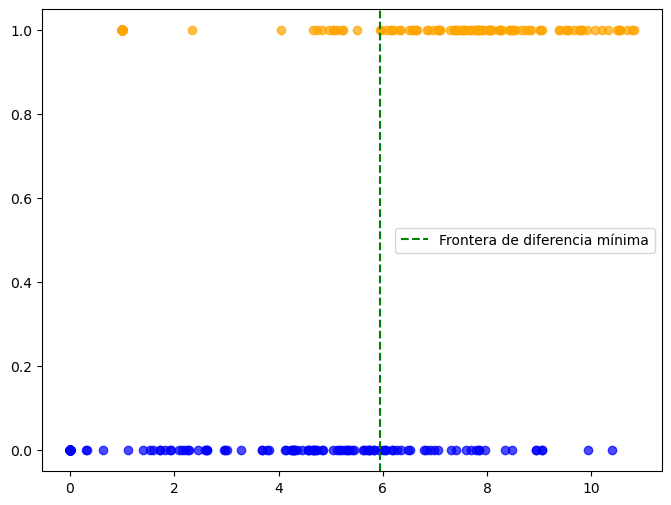

In [352]:
plt.figure(figsize=(8, 6))
plt.scatter(dfTrain[dfTrain['Y'] == 0], np.zeros_like(dfTrain[dfTrain['Y'] == 0]), color="blue", alpha=0.7)
plt.scatter(dfTrain[dfTrain['Y'] == 1], np.ones_like(dfTrain[dfTrain['Y'] == 1]), color="orange", alpha=0.7)
plt.axvline(x[maxIndexPdf1[0]+indexMin], color="green", linestyle="--", label="Frontera de diferencia mínima")
plt.legend()

## 6
<p style="font-size:18px">Creamos el dataframe con los datos de testeo</p>

In [355]:
sample2F1 = f1.rvs(size=25)
sample2F2 = f2.rvs(size=25)
dfTest1 = pd.DataFrame(data={'X_1':sample2F1,'Y':np.zeros(sample2F1.size)})
dfTest2 = pd.DataFrame(data={'X_1':sample2F2,'Y':np.ones(sample2F2.size)})
dfTest = pd.concat([dfTest1,dfTest2],ignore_index=True)
dfTest.head()

,X_1,Y
0,7.107820,0.0
1,9.491410,0.0
2,0.507355,0.0
3,1.657910,0.0
4,5.011425,0.0


## 7
<p style="font-size:18px">Intentamos la regresión lineal</p>

In [358]:
clf = LinearRegression()

In [360]:
XTrain = np.array(dfTrain['X_1']).reshape(-1, 1)
YTrain = np.array(dfTrain['Y']).reshape(-1,1)
clf.fit(XTrain,YTrain)

LinearRegression()

In [362]:
score = clf.score(XTrain,YTrain)
score

0.3417965083888087

<p style="font-size:18px">Este score puede dar un indicio de que una regresión lineal no hace el mejor ajuste para estos tipos de datos, pues este tipo de regresiones asumen que los datos (features) dan lugar a un comportamiento lineal en las etiquetas. Sin embargo, nosotros solo tenemos dos etiquetas y el objetivo de la frontera es intentar clasificar si un dato (feature) pertenece a una distribución u otra. </p>

<p style="font-size:18px">Es decir, la regresión lineal debe ser usada para un problema de regresión donde haya intuición de un comportamiento lineal en los datos objetivos, más no para un problema de clasificación binaria.</p>

Regresión lineal con intercepto[-0.2609456] y coeficiente [[0.12017708]]


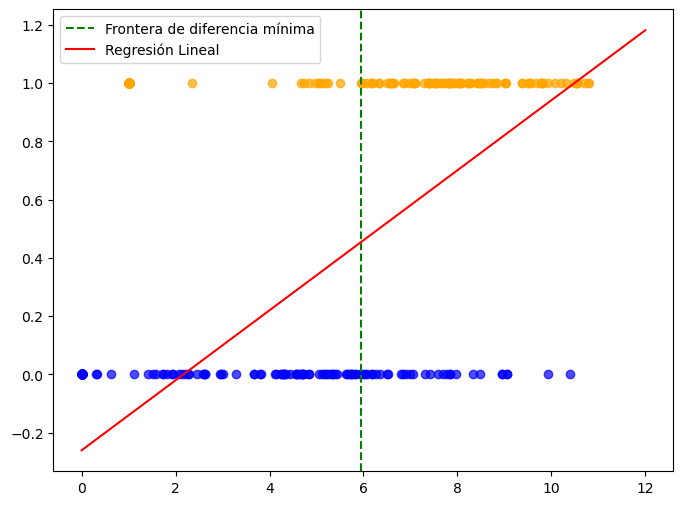

In [365]:
plt.figure(figsize=(8, 6))
plt.scatter(dfTrain[dfTrain['Y'] == 0], np.zeros_like(dfTrain[dfTrain['Y'] == 0]), color="blue", alpha=0.7)
plt.scatter(dfTrain[dfTrain['Y'] == 1], np.ones_like(dfTrain[dfTrain['Y'] == 1]), color="orange", alpha=0.7)
plt.axvline(x[maxIndexPdf1[0]+indexMin], color="green", linestyle="--", label="Frontera de diferencia mínima")

coeff = clf.coef_
intercepto = clf.intercept_
print("Regresión lineal con intercepto"+str(intercepto)+" y coeficiente "+str(coeff))
xRange = np.linspace(0,12,100)

regresion = np.array(coeff*xRange + intercepto).reshape(-1,1)

plt.plot(xRange, regresion, color='red',label="Regresión Lineal")
plt.legend()

<p style="font-size:18px">• Probemos los clasificadores propuestos: <br>&emsp;
1. DecisionTreeClassifier</p>

In [368]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf2 = DecisionTreeClassifier(max_depth=3) #Tener max_depth 1,2 o 3 no afecta la precisión. A partir de 4 se empieza a observar un overfitting
clf2 = clf2.fit(XTrain,YTrain)

XTest = np.array(dfTest['X_1']).reshape(-1,1)
YTest = np.array(dfTest['Y'])
YPredTree = clf2.predict(XTest)

scoreTree = metrics.accuracy_score(YTest,YPredTree)
print("Precisón del DecisionTreeClassifier:",scoreTree)

Precisón del DecisionTreeClassifier: 0.74


<p style="font-size:18px">&emsp;
2. SVC</p>

In [371]:
from sklearn import svm
clf3 = svm.SVC(kernel='linear',C=0.025) #Posibles valores-> kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
clf3 = clf3.fit(XTrain, np.array(dfTrain['Y']))
YPredSVC = clf3.predict(XTest)

scoreSVC = metrics.accuracy_score(YTest,YPredSVC)
print("Precisión del Clasificador SupportVectorMachine:",scoreSVC)

Precisión del Clasificador SupportVectorMachine: 0.68


<p style="font-size:18px">Estos modelos tiene una precisión relativamente más alta, pues a diferencia de la regresión lineal, pueden crear fronteras entre los grupos de datos de una forma más flexible (no solo lineal). </p>

<p style="font-size:18px">• Algo que observé que debe ser considerado al implementar los DecisionTreeClassifier es que son sensibles a los parámetros inciales (como el max_depth) y que pueden resultar en un over o underfitting si no se ajustan.</p>

<p style="font-size:18px">• Extrañamente, el model de SVC tuvo una precisión similar y, si no se modificaba el parámetro de regularización <strong>C</strong>, no importaba si usabamos un kernel <strong>rbf o lineal</strong>.</p>

<p style="font-size:18px"> Al considerar el parámetro de regularización y colocar el valor sugerido (C=0.025) con el kernel rbf, el score de precisión aumenta en 0.02 (precision 0.78). Con el kernel lineal mantiene el mismo score (precision 0.76)</p>

## 8. Optimización de parámetros con GridSearchCV

In [375]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_clf = GridSearchCV(estimator=clf2, param_grid=param_grid, cv= 10) #Optimizacion para el deciscionTree
CV_clf.fit(XTrain, YTrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [377]:
print ("Mejor Score encontrado en el grid fue: ",CV_clf.best_score_, ", Criterion:",CV_clf.best_params_['criterion'],", max_depth: ",CV_clf.best_params_['max_depth'])

Mejor Score encontrado en el grid fue:  0.77 , Criterion: entropy , max_depth:  2


## 9. Curvas de aprendizaje

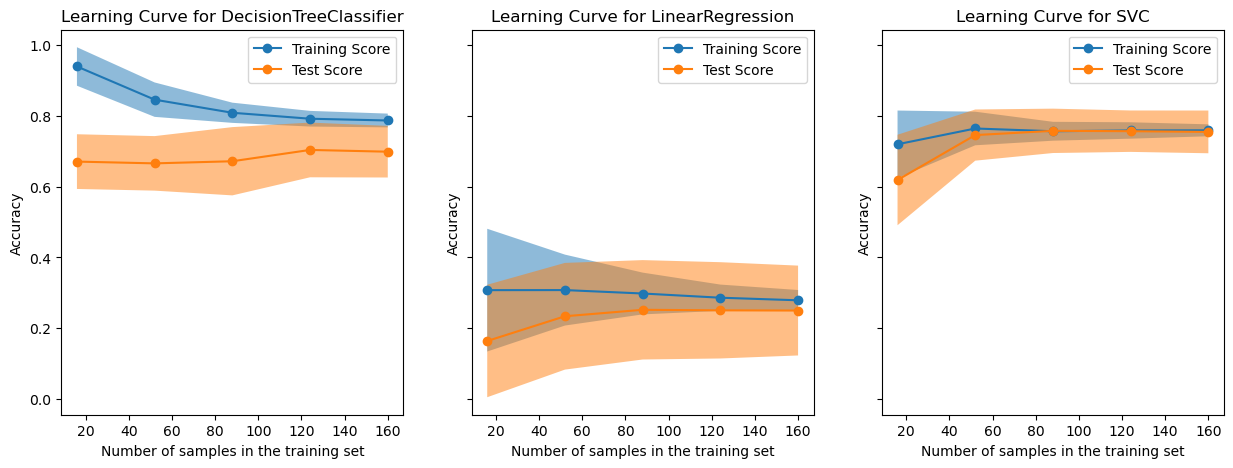

In [380]:
#Tomado de los ejemplos de la doc de Sklearn (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

common_params = {
    "X": Xx,
    "y": Yy,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=25, test_size=0.2, random_state=23492),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf2, clf,clf3]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## 10.

In [397]:
def get_learning_curve_normal_dist(estimator,train_size,mean1,desv1,mean2,desv2):
    dist1 = stats.norm(loc = mean1, scale = desv1)
    dist2 = stats.norm(loc = mean2, scale = desv2)
    sampleD1 = dist1.rvs(size=train_size)
    sampleD2 = dist2.rvs(size=train_size)
    df_zeros = pd.DataFrame(data={'X':sampleD1,'Y':np.zeros(sampleD1.size)})
    df_ones = pd.DataFrame(data={'X':sampleD2,'Y':np.ones(sampleD2.size)})
    df = pd.concat([df_zeros,df_ones],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index))
    X = df['X'].to_numpy().reshape(-1, 1)
    Y = df['Y'].to_numpy().reshape(-1, 1)
    #print(X)
    ##Plot de la curva de aprendizaje
    fig, ax = plt.subplots()
    ax.set_ylim([0, 1])
    
    common_params = {
        "X": X,
        "y": Y,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "cv": ShuffleSplit(n_splits=25, test_size=0.2, random_state=23492),
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)

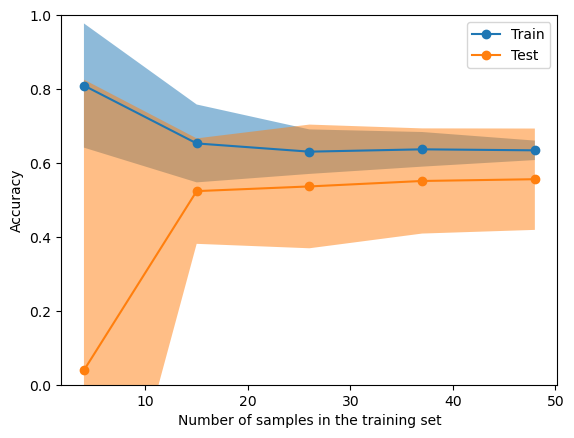

In [399]:
# A.
get_learning_curve_normal_dist(clf,30,7.5,1,10,1)

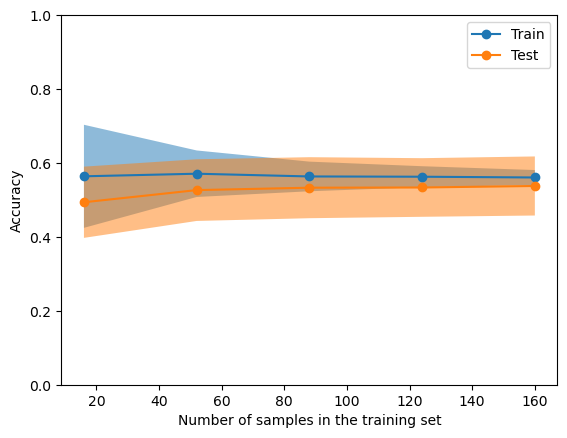

In [403]:
# B.
get_learning_curve_normal_dist(clf,100,7.5,1,10,1)

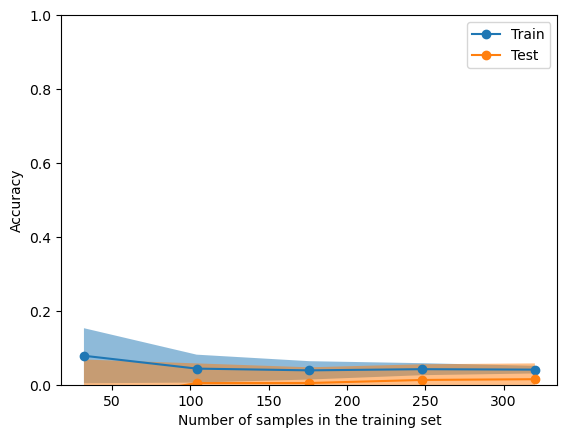

In [405]:
# C.
get_learning_curve_normal_dist(clf,200,7.5,2,7,2)

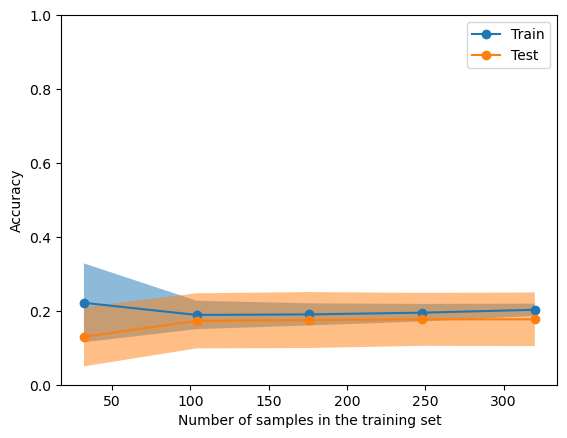

In [421]:
# D.
get_learning_curve_normal_dist(clf,200,7.5,0.5,7,0.5)

<p style="font-size:18px"> Aplicando estos ejemplos puntuales podemos notar que entre más se parezcan las distribuciones (menos distinguible sea la frontera entre los grupos de datos), más difícil será para un modelo de regresión lineal para clasificar los datos. Cuando las medias y las desviaciones estandar son muy similares, el puntaje de precisión de va para el piso, y tener más datos no cambia nada.</p>

<p style="font-size:18px">Si las distribuciones están suficientemente separadas, el modelo de regresión lineal como clasificador obtiene un score aceptable aunque aún mediocre. Aumentar el tamaño de las muestras resulta en un decremento de la precisión, pues sus parámetros son poco flexibles por lo que cae en un overfitting rápidamente sin mejorar.</p>

<p style="font-size:18px">Si probamos otro estimador como el DecisionTree, aún para las distribuciones que son muy similares una a la otra, obtenemos unos resultados decentes:</p>

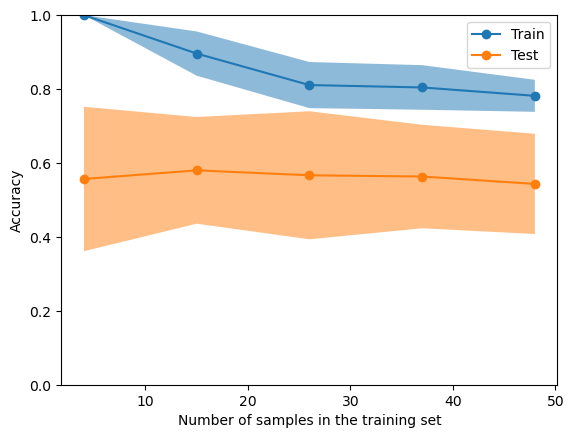

In [426]:
# Extra 1
get_learning_curve_normal_dist(clf2,30,7.5,0.5,7,0.5)

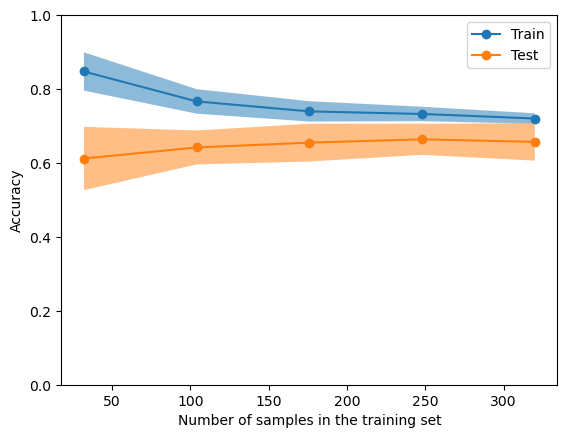

In [430]:
# Extra 2
get_learning_curve_normal_dist(clf2,200,7.5,0.5,7,0.5)

<p style="font-size:18px"> En este caso, la incertidumbre en las curvas de aprendizaje sí disminuye considerablemente al aumentar el tamaño de las muestras y los puntajes de precisión son en general más altos para cualquier tamaño de muestras comparado con el estimador de Regresión lineal </p>